In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

# reading the data set 
df = pd.read_csv("drowsiness_dataset.csv")

# See the first few lines 
#print(df.head())

# Dataset Summary 
#print(df.describe())

# Checking for any null values 
#rint(df.isnull().sum())

# Decided to sort the data with ascending heart rates 
#df.sort_values(by='heartRate', ascending=True)

#lowest to highest heart rate from 54.0 to 63.0 
#df.head()

df.tail()


,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
4890255,63.0,2286384.0,5783226.0,6356797.0,2.0
4890256,63.0,2289887.0,5783786.0,6357004.0,2.0
4890257,63.0,2291928.0,5784221.0,6358348.0,2.0
4890258,63.0,2295386.0,5785012.0,6358565.0,2.0
4890259,63.0,2296992.0,5783386.0,6357466.0,2.0


In [4]:
# Dividing data in the 4 periods 
num_periods = 4 
period_size = len(df) // num_periods 

# The data set is divided in the 4 time periods 
period_labels = ["Morning","Afternoon","Evening","Night"]
df['period'] = pd.cut(df.index, bins = num_periods, labels= period_labels)

print(df['period'].value_counts())

morning_data = df[df['period'] == 'Morning']
afternoon_data = df[df['period'] == 'Afternoon']
evening_data = df[df['period'] == 'Evening']
night_data = df[df['period'] == 'Night']


period
Morning      1222565
Afternoon    1222565
Evening      1222565
Night        1222565
Name: count, dtype: int64


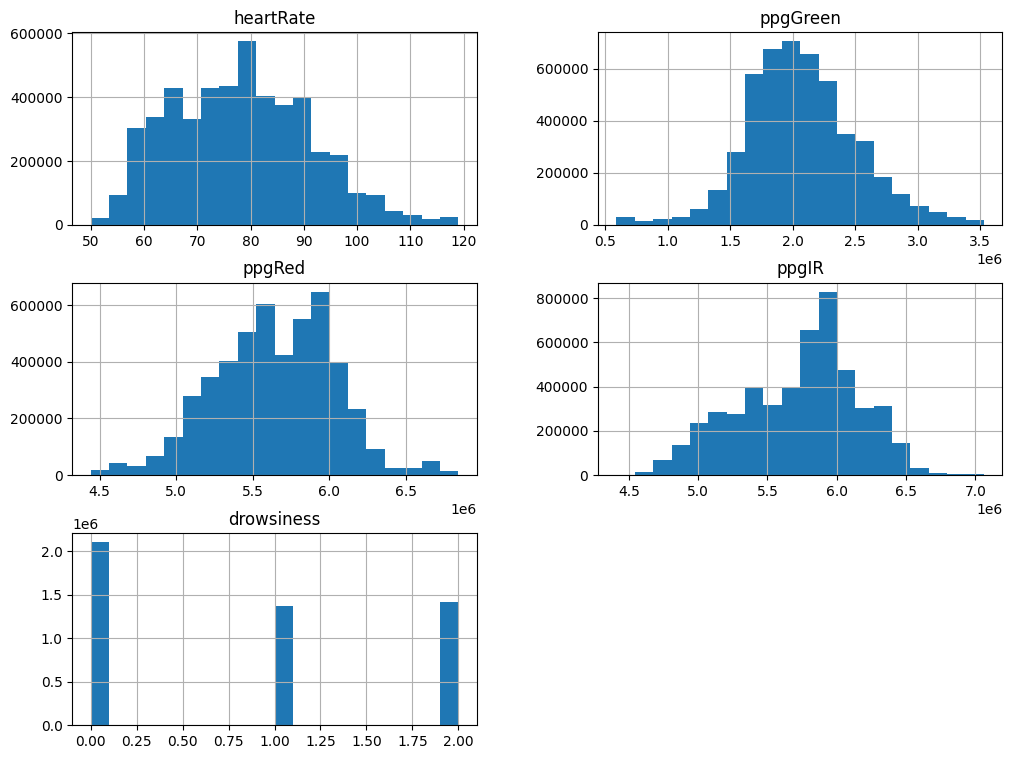

In [6]:
import matplotlib.pyplot as plt 

#Histogram for numerical columns
df.hist(bins = 20, figsize=(12, 9))
plt.show()

Correlation between drowsiness and heart rate(Morning): -0.6319114762754944
Correlation between drowsiness and PPG green(Morning): -0.08278873014767459
Correlation between drowsiness and PPG red(Morning): -0.6565096863047643
Correlation between drowsiness and PPG Infrared(Morning): -0.5784903897390827


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


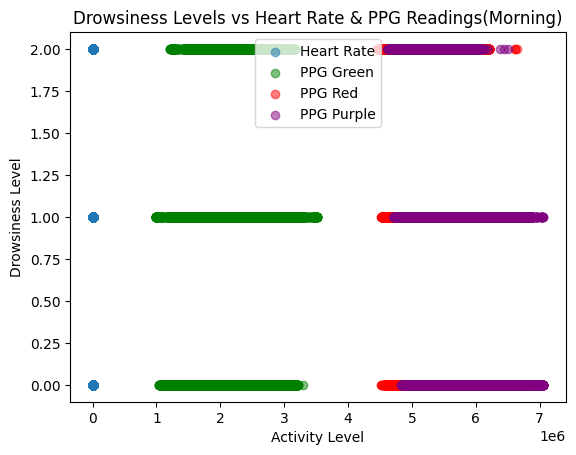

Correlation between drowsiness and heart rate(Afternoon): -0.7295576553744954
Correlation between drowsiness and PPG green(Afternoon): 0.24140212200218605
Correlation between drowsiness and PPG red(Afternoon): 0.036138940883998674
Correlation between drowsiness and PPG Infrared(Afternoon): -0.2655153229308298


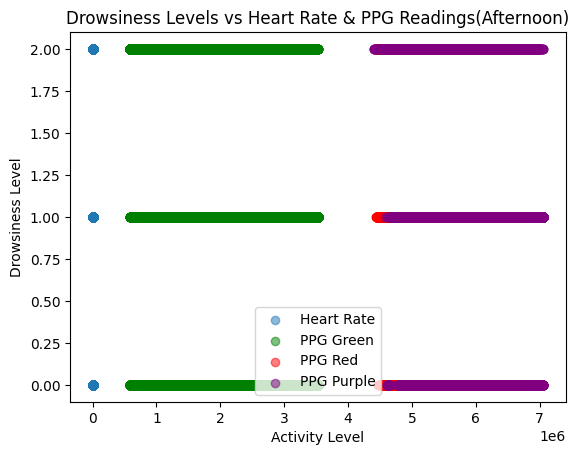

Correlation between drowsiness and heart rate(Evening): -0.6319114762754944
Correlation between drowsiness and PPG green(Evening): -0.08278873014767459
Correlation between drowsiness and PPG red(Evening): -0.6565096863047643
Correlation between drowsiness and PPG Infrared(Evening): -0.5784903897390827


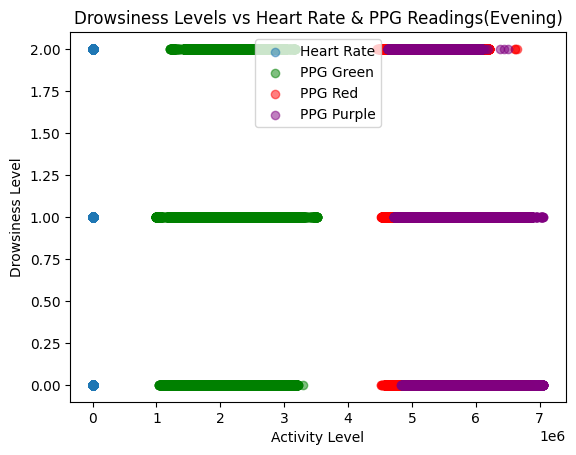

Correlation between drowsiness and heart rate(Night): -0.7295576553744954
Correlation between drowsiness and PPG green(Night): 0.24140212200218605
Correlation between drowsiness and PPG red(Night): 0.036138940883998674
Correlation between drowsiness and PPG Infrared(Night): -0.2655153229308298


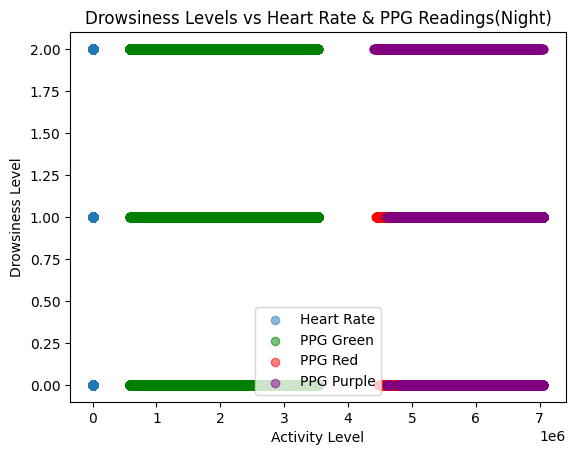

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Calculate & Plot correlations b/w Data & periods 
def calculate_and_plot_correlations(data, period_name):
    correlation_heart_rate = data['drowsiness'].corr(data['heartRate'])
    correlation_heart_ppg_green = data['drowsiness'].corr(data['ppgGreen'])
    correlation_heart_ppg_red = data['drowsiness'].corr(data['ppgRed'])
    correlation_heart_ppg_ir = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate({period_name}): {correlation_heart_rate}')
    print(f'Correlation between drowsiness and PPG green({period_name}): {correlation_heart_ppg_green}')
    print(f'Correlation between drowsiness and PPG red({period_name}): {correlation_heart_ppg_red}')
    print(f'Correlation between drowsiness and PPG Infrared({period_name}): {correlation_heart_ppg_ir}')

    plt.scatter(data['heartRate'], data['drowsiness'], alpha = 0.5, label='Heart Rate')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha = 0.5, label='PPG Green', color = 'green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha = 0.5, label='PPG Red', color = 'red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha = 0.5, label='PPG Purple', color = 'purple')
    plt.title(f'Drowsiness Levels vs Heart Rate & PPG Readings({period_name})')
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend()
    plt.show()


calculate_and_plot_correlations(morning_data, 'Morning')
calculate_and_plot_correlations(afternoon_data, 'Afternoon')
calculate_and_plot_correlations(evening_data, 'Evening')
calculate_and_plot_correlations(night_data, 'Night')


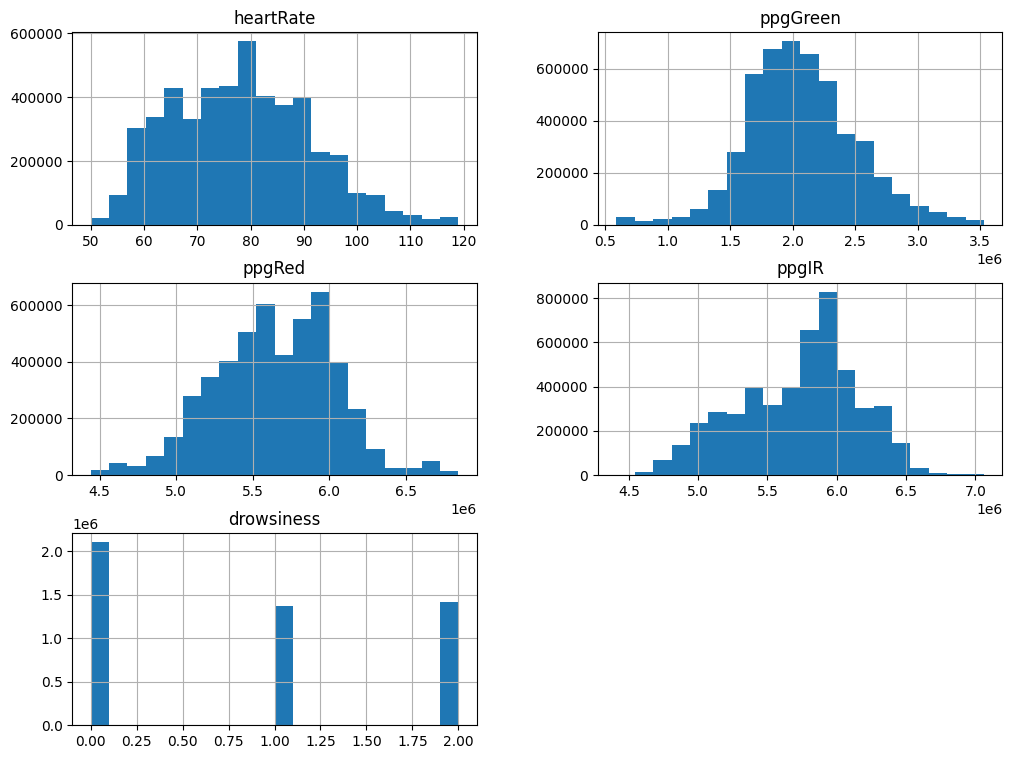

In [8]:
#Histogram for numerical columns
df.hist(bins = 20, figsize=(12, 9))
plt.show()

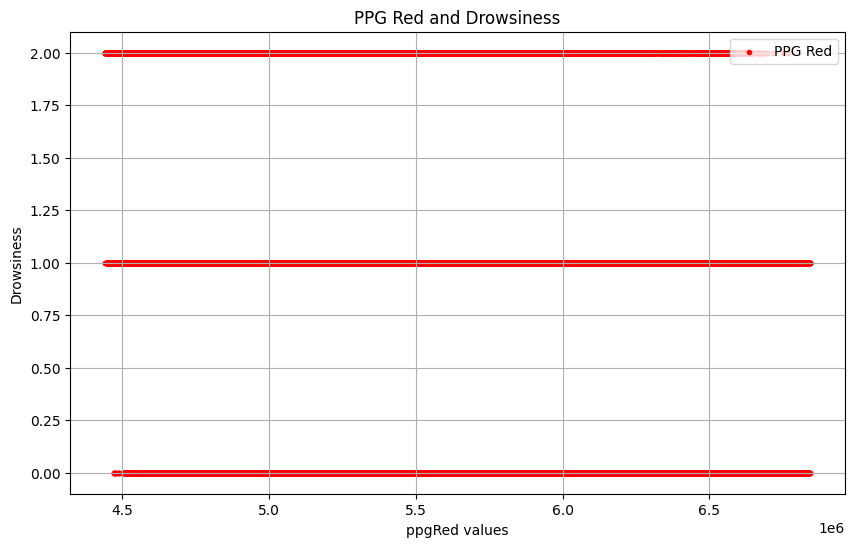

In [4]:
# Creating the line graph of ppgRed with the corresponding heartRate
plt.figure(figsize=(10, 6))

#df_no_duplicates = df.drop_duplicates(subset='heartRate')

# Plotting ppgRed
plt.scatter(df['ppgRed'], df['drowsiness'], marker='.', color='red', label='PPG Red')

plt.xlabel('ppgRed values')
plt.ylabel('Drowsiness')
plt.title('PPG Red and Drowsiness')
plt.legend()
plt.grid(True)
plt.show()


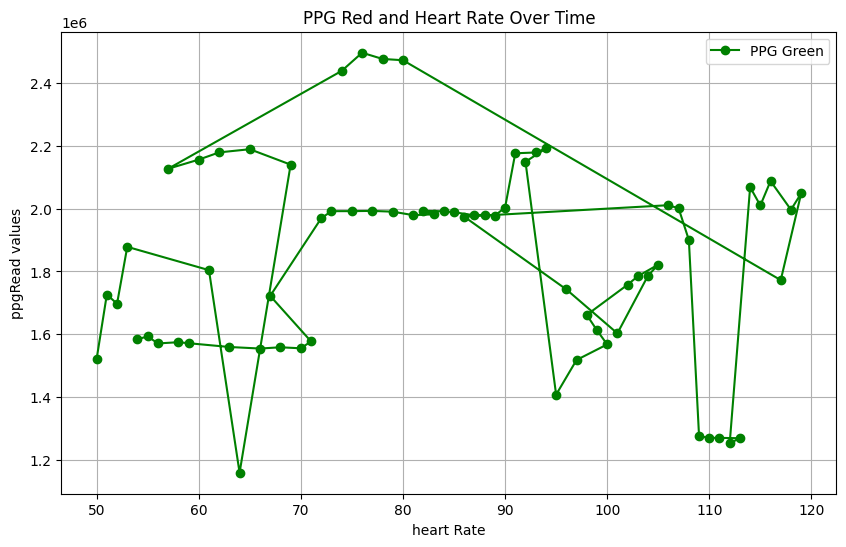

In [67]:
# Creating the line graph of ppgRed with the corresponding heartRate
plt.figure(figsize=(10, 6))

df_no_duplicates = df.drop_duplicates(subset='heartRate')

# Plotting ppgRed
plt.plot(df_no_duplicates['heartRate'], df_no_duplicates['ppgGreen'], marker='o', color='green', label='PPG Green')

plt.xlabel('heart Rate')
plt.ylabel('ppgRead values')
plt.title('PPG Red and Heart Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

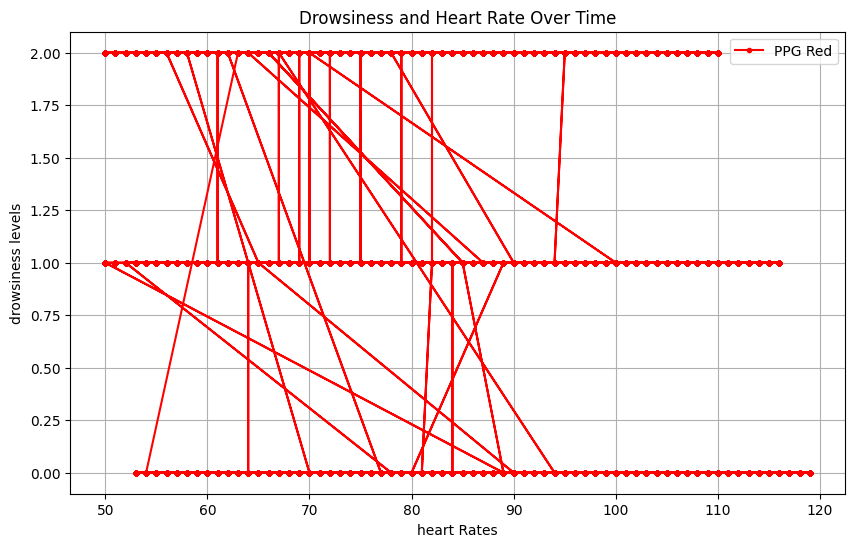

In [61]:
# Creating the line graph of ppgRed with the corresponding heartRate
plt.figure(figsize=(10, 6))

# Plotting ppgRed
plt.scatter(df['heartRate'], df['drowsiness'], marker='.', color='red')

plt.xlabel('heart Rates')
plt.ylabel('drowsiness levels')
plt.title('Drowsiness and Heart Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

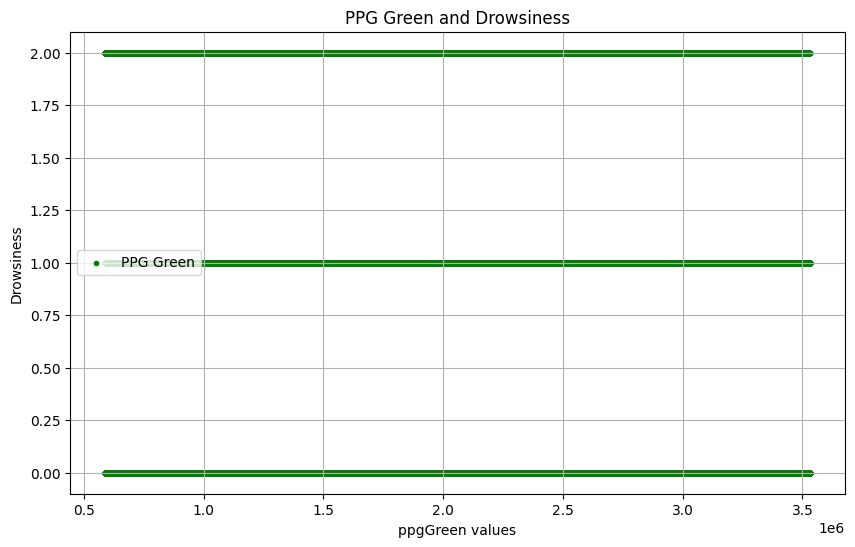

In [5]:
# Creating the line graph of ppgRed with the corresponding heartRate
plt.figure(figsize=(10, 6))

#df_no_duplicates = df.drop_duplicates(subset='heartRate')

# Plotting ppgRed
plt.scatter(df['ppgGreen'], df['drowsiness'], marker='.', color='green', label='PPG Green')

plt.xlabel('ppgGreen values')
plt.ylabel('Drowsiness')
plt.title('PPG Green and Drowsiness')
plt.legend()
plt.grid(True)
plt.show()


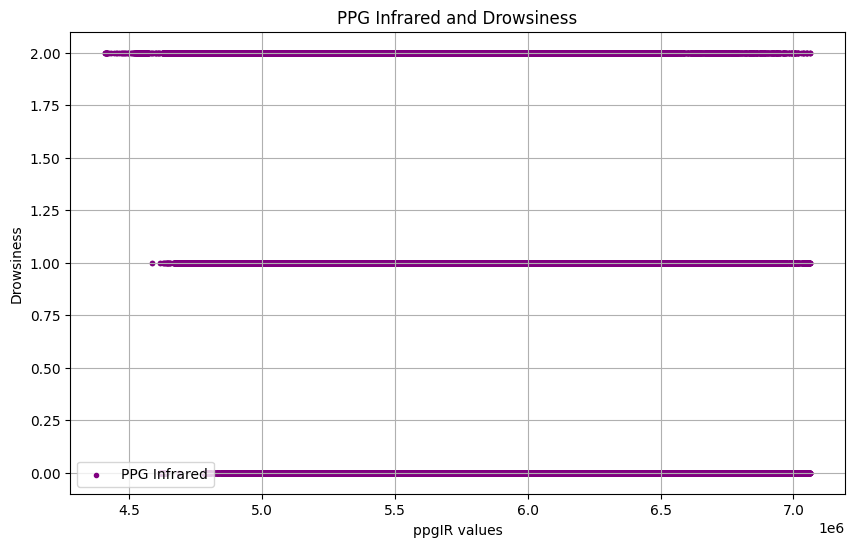

In [6]:
# Creating the line graph of ppgRed with the corresponding heartRate
plt.figure(figsize=(10, 6))

#df_no_duplicates = df.drop_duplicates(subset='heartRate')

# Plotting ppgRed
plt.scatter(df['ppgIR'], df['drowsiness'], marker='.', color='purple', label='PPG Infrared')

plt.xlabel('ppgIR values')
plt.ylabel('Drowsiness')
plt.title('PPG Infrared and Drowsiness')
plt.legend()
plt.grid(True)
plt.show()
